---
> ## **특성공학(Feature Enginnering)**
> - #### **방법 : 데이터를 잘 만들기 + 알고리즘을 통제**
> - #### **하는 이유 : 학습을 했을 때, 평가가 좋지 않을 때 사용**
> - #### **학습의 목적에 맞게 데이터를 깔끔하게 다듬기**
> - #### **과정**
> #### 1. Scaling & Encoding
> #### 2. Imputation
> #### **3. Cross Validation (교차검증)**
> #### **4. Hyper Parameter Tuning (매개변수 튜닝)**
> #### **5. Imbalanced Data Sampling**
> - **비율이 다른 범주형 Y**에 대해 분류를 진행할 때, 데이터의 비율을 맞춰주는 작업
> - 학습하는 과정에서 학습 데이터에 적용하여 사용 -> pipe line(Sklearn)
> 1) **Under Sampling : 데이터의 비율이 적은 쪽으로 데이터를 맞춰주는 작업**
>    - Random Under Sampling : 데이터의 비율이 많은 쪽에 값을 무작위로 줄이는 방법
>    - Tomek's link : 인접합 Class들을 묶어 밀집된 
>
> 2) **Over Sampling : 데이터의 비율이 큰 쪽으로 데이터를 생성**
>    - Ramdom Over Sampling : 무작위
>    - SMOTE (Synthetic Minority Over Sampling Technique): KNN 방법을 활용해 비율이 적은 쪽 데이터를 K개의 인접데이터 수만큼 묶어, 묶인 데이터 내 중심위치를 찾아 새로운 데이터를 생성
>    - ADASYN (Adaptive Synthetic Sampling) : SMOTE 기법을 이용해 데이터를 생성하는 단계에서 임의의 작은 값을 더하여 사실적인 데이터로 형성

---

In [1]:
import numpy as np
import pandas as pd # 정형데이터 전처리 / 통계 연산 수행

import seaborn as sns # 통계적 시각화 연산
import matplotlib as mpl # 시각화 옵션 (외부)
import matplotlib.pyplot as plt # 시각화 옵션 (내부)
import plotly.express as px # 동적 그래프 시각화
import scipy.stats as stats # 통계적 가설 검정 수행

mpl.rc('font',family='Malgun Gothic') # 한글 글꼴 설정

In [2]:
df1 = pd.read_csv("01_Data.csv")

In [3]:
df1['Target'] = df1['State'].replace({'계약확정':'정상','기간만료':'정상',
                     '해약확정':'해약','해약진행중':'해약'})

In [4]:
df1.columns

Index(['Index', 'Member_ID', 'Sales_Type', 'Contract_Type', 'Channel',
       'Datetime', 'Term', 'Payment_Type', 'Product_Type', 'Amount_Month',
       'Customer_Type', 'Age', 'Address1', 'Address2', 'State',
       'Overdue_count', 'Overdue_Type', 'Gender', 'Credit_Rank', 'Bank',
       'Target'],
      dtype='object')

In [5]:
X = df1[['Sales_Type','Term','Product_Type', 'Amount_Month','Age','Gender', 'Credit_Rank']]
Y = df1['Target']

In [6]:
from sklearn.model_selection import train_test_split # 머신러닝 데이터 split
from imblearn.pipeline import make_pipeline # 특성공학 + 학습 파이프 생성함수
from sklearn.compose import make_column_transformer # 각 항목의 타입별로 파이프 분할
from sklearn.impute import SimpleImputer        # 1. 결측치 대치
from sklearn.preprocessing import MinMaxScaler  # 2. 숫자 스케일링
from sklearn.preprocessing import OneHotEncoder # 3. 문자 인코딩 (항목 -> 1/0)
from sklearn.model_selection import GridSearchCV # 교차검증 + 매개변수 튜닝
from sklearn.tree import DecisionTreeClassifier # 분류모델
from sklearn.metrics import classification_report # 분류모델의 성능 측정함수

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   random_state=1234)

In [8]:
numeric_pipe = make_pipeline((SimpleImputer(strategy='mean')),
                              (MinMaxScaler()))
category_pipe = make_pipeline((SimpleImputer(strategy='most_frequent')),
                              (OneHotEncoder()))
category_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder())])

In [9]:
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include='object').columns.tolist()
preprocessing_pipe=make_column_transformer( (numeric_pipe, numeric_list),
                                           (category_pipe, category_list))
model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeClassifier())

---
> ### **3. Cross Validation (교차검증)**
- GridSearchCV

> ### **4. Hyper Parameter Tuning (매개변수 튜닝)**
- hyperparameter_dict
---

In [10]:
hyperparameter_dict = {'decisiontreeclassifier__max_depth':range(5,10)}
grid_model = GridSearchCV(model_pipe,cv=5,param_grid = hyperparameter_dict,
                         scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)

C:\Users\DMCCONET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Term',
                                                                          'Amount_Month',
                                                                          'Age',
                                                                          'Credit_Rank']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Sales_Type',
                                                                          'Product_Type',
                                                                          'Gender'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': range(5, 10)},
             scoring='f1')

In [11]:
best_model = grid_model.best_estimator_

In [12]:
def evaluation_func(best_model):
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print("학습성능")
    print(classification_report(Y_train,Y_train_pred))
    print('일반화 성능')
    print(classification_report(Y_test, Y_test_pred))

In [13]:
evaluation_func(best_model)

학습성능
              precision    recall  f1-score   support

          정상       0.99      1.00      0.99     37984
          해약       0.80      0.01      0.02       491

    accuracy                           0.99     38475
   macro avg       0.89      0.50      0.50     38475
weighted avg       0.98      0.99      0.98     38475

일반화 성능
              precision    recall  f1-score   support

          정상       0.99      1.00      0.99     12681
          해약       0.00      0.00      0.00       145

    accuracy                           0.99     12826
   macro avg       0.49      0.50      0.50     12826
weighted avg       0.98      0.99      0.98     12826



---
> ## **5. Imbalanced Data Sampling**
---

####  Under Sampling - TomekLinks

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [15]:
under_sampler = RandomUnderSampler()
under_sampler.fit(X,Y)

RandomUnderSampler()

In [16]:
X_under, Y_under = under_sampler.fit_resample(X,Y)

In [17]:
Y_under.value_counts()

정상    636
해약    636
Name: Target, dtype: int64

In [18]:
from imblearn.under_sampling import TomekLinks

In [19]:
df1_clean = df1.dropna()

In [20]:
under_sampler = TomekLinks()
under_sampler.fit(df1_clean[['Age','Term']],df1_clean['Target'])

TomekLinks()

In [21]:
X_under,Y_under = under_sampler.fit_resample(df1_clean[['Age','Term']],df1_clean['Target'])
Y_under.value_counts()

정상    40137
해약      510
Name: Target, dtype: int64

---
> ### **모델에 적용할 때**
> - Imbalanced Data Sampling 기법을 선택해서 **preprocessing_pipe(데이터전처리파이프)와 DecisionTreeClassifier(분류모델) 사이에 넣으면 된다**
---

#### Over Sampling - SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
model_pipe = make_pipeline(preprocessing_pipe,SMOTE(),DecisionTreeClassifier())

hyperparameter_dict = {'decisiontreeclassifier__max_depth':range(5,10)}
grid_model = GridSearchCV(model_pipe,cv=5,param_grid = hyperparameter_dict,
                         scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_model = grid_model.best_estimator_
evaluation_func(best_model)

C:\Users\DMCCONET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


학습성능
              precision    recall  f1-score   support

          정상       0.99      0.95      0.97     37984
          해약       0.09      0.38      0.15       491

    accuracy                           0.94     38475
   macro avg       0.54      0.67      0.56     38475
weighted avg       0.98      0.94      0.96     38475

일반화 성능
              precision    recall  f1-score   support

          정상       0.99      0.95      0.97     12681
          해약       0.07      0.35      0.12       145

    accuracy                           0.94     12826
   macro avg       0.53      0.65      0.55     12826
weighted avg       0.98      0.94      0.96     12826



---
> ### **CV를 반복적으로 진행하여 최적의 hyperparameter으로 조정**
---

In [24]:
model_pipe = make_pipeline(preprocessing_pipe,SMOTE(),DecisionTreeClassifier())

hyperparameter_dict = {'decisiontreeclassifier__max_depth':range(5,15),
                      'decisiontreeclassifier__min_samples_leaf':range(5,15),
                      'decisiontreeclassifier__min_samples_split':range(5,15)}
grid_model = GridSearchCV(model_pipe,cv=5,param_grid = hyperparameter_dict,
                         scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_model = grid_model.best_estimator_
evaluation_func(best_model)

C:\Users\DMCCONET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan 

학습성능
              precision    recall  f1-score   support

          정상       0.99      0.95      0.97     37984
          해약       0.09      0.38      0.15       491

    accuracy                           0.94     38475
   macro avg       0.54      0.67      0.56     38475
weighted avg       0.98      0.94      0.96     38475

일반화 성능
              precision    recall  f1-score   support

          정상       0.99      0.95      0.97     12681
          해약       0.07      0.34      0.12       145

    accuracy                           0.94     12826
   macro avg       0.53      0.64      0.55     12826
weighted avg       0.98      0.94      0.96     12826



---
# **Mission 8**
---

In [25]:
df1 = pd.read_csv("10_Data.csv",encoding='CP949')
df1

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37
1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83
2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55
3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81
4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24064,1,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.136538,117.336538,152.813288,23.651,203.823,71.54
24065,2,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,71.874219,106.174219,141.470619,23.531,207.574,76.03
24066,3,D088,냉동밥 내포장#1,2021-10-29,1BA03713,NaN,W005,72.942705,119.742705,155.733955,23.994,210.006,74.50
24067,4,D088,냉동밥 내포장#1,2021-10-29,1BA03606,콩콩푸드밥3kg,W005,70.664452,65.764452,100.773102,23.339,209.513,72.12


### 1. 데이터의 구조와 타입을 확인하고, '작업장코드'별 항목과 빈도수를 확인

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24069 entries, 0 to 24068
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      24069 non-null  int64  
 1   생산라인코드  24069 non-null  object 
 2   생산라인명   24069 non-null  object 
 3   생산일자    24069 non-null  object 
 4   품목코드    24031 non-null  object 
 5   품목명     24012 non-null  object 
 6   작업장코드   24069 non-null  object 
 7   충전실온도   24069 non-null  float64
 8   실링온도    24041 non-null  float64
 9   쿠킹온도    24041 non-null  float64
 10  쿠킹스팀압력  24069 non-null  float64
 11  실링압력    24069 non-null  float64
 12  생산시간    22991 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.4+ MB


In [27]:
df1.작업장코드.value_counts()

W005    13013
W003     8204
W007     2478
W002      359
W012       15
Name: 작업장코드, dtype: int64

### 2. '작업장코드'에서 빈도수가 가장 높은 항목을 추출해 df1_top으로 선언하고, df1_top데이터의 실링압력이 높은 상위 100개 데이터를 추출해 result_top.xlsx 저장

In [28]:
df1_top = df1[df1.작업장코드 == df1.작업장코드.value_counts().index[0]]
df1_top.sort_values(by='실링압력',ascending=False).head(100).to_excel("result_top.xlsx")
df1_top.sort_values(by='실링압력',ascending=False).head(100)

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
16914,6,D088,냉동밥 내포장#1,2018-10-22,1BA03137,매드포갈릭갈릭버터라이스300g,W005,72.794275,108.894275,145.099075,24.137,220.636,75.77
18299,4,D088,냉동밥 내포장#1,2019-03-19,1BA03137,매드포갈릭갈릭버터라이스300g,W005,73.586050,105.186050,141.778800,24.395,220.537,73.31
17706,7,D087,냉동밥 내포장#2,2019-01-15,1BA03216,AAF게살새우볶음밥(알밥)*,W005,72.140175,107.940175,143.920025,23.987,220.390,77.19
7507,4,D006,튜브,2016-05-30,13R10026,Sias허니브라운머스타드소스960g,W005,72.313530,106.213530,142.142480,23.953,220.205,75.41
17742,2,D088,냉동밥 내포장#1,2019-01-17,1BA03223,굴소스로맛을낸게살새우볶음밥,W005,72.459255,NaN,NaN,24.096,220.194,79.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,14,D004,PET병,2011-08-18,13A00455,소불고기양념장600g-수출,W005,71.623949,116.823949,152.300699,23.651,217.461,79.75
20084,11,D088,냉동밥 내포장#1,2019-10-30,1BA03485,날치알밥베이스,W005,71.817261,95.917261,131.689261,23.848,217.450,79.24
23413,4,D088,냉동밥 내포장#1,2021-05-24,1BA03523,애슐리갈릭스테이크볶음밥,W005,72.091527,103.691527,140.082177,24.260,217.449,72.82
16177,6,D088,냉동밥 내포장#1,2018-08-13,1BA03051,쉐프솔루션베이스볶음밥(시즌)500g,W005,72.215976,92.915976,128.938176,24.015,217.386,80.38


### 3. df1 데이터에서 '충전실온도'가 상위 10%해당하는 데이터를 추출하여, df1_temp_top 선언하고, 해당 데이터의 '쿠킹온도'의 평균과 중앙값의 차이를 계산하시오

In [29]:
df1_temp_top = df1[df1.충전실온도>= df1.충전실온도.quantile(q=0.9)]
df1_temp_top.쿠킹온도.mean() - df1_temp_top.쿠킹온도.median()

0.14462280002086914

### 4. 공정 조업조건 간 상관관계를 확인하고자 한다. '충전실온도'와 나머지 숫자 변수들('실링온도', '쿠킹스팀압력','실링압력','생산시간')간의 산점도를 시각화

<AxesSubplot: xlabel='충전실온도', ylabel='실링온도'>

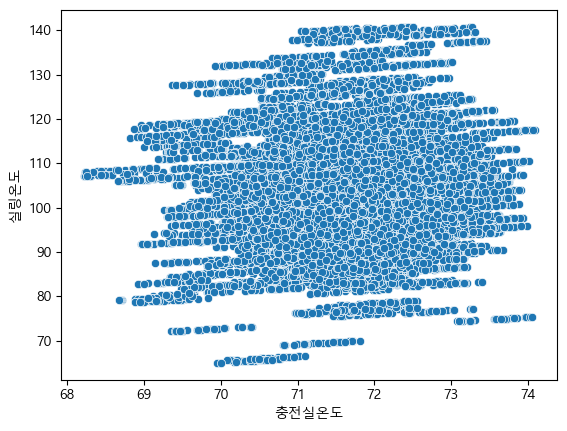

In [30]:
sns.scatterplot(x=df1['충전실온도'],y=df1['실링온도'])

<AxesSubplot: xlabel='충전실온도', ylabel='쿠킹스팀압력'>

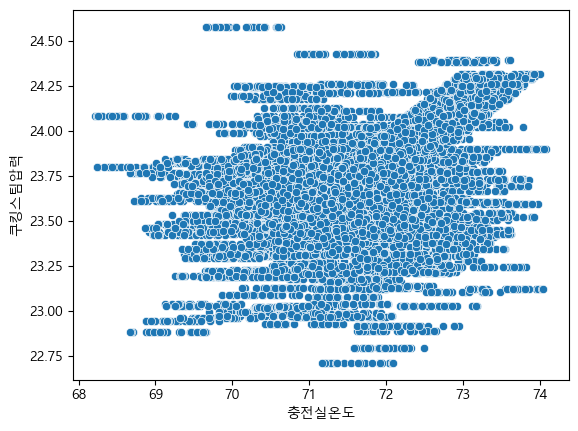

In [31]:
sns.scatterplot(x=df1['충전실온도'],y=df1['쿠킹스팀압력'])

<AxesSubplot: xlabel='충전실온도', ylabel='실링압력'>

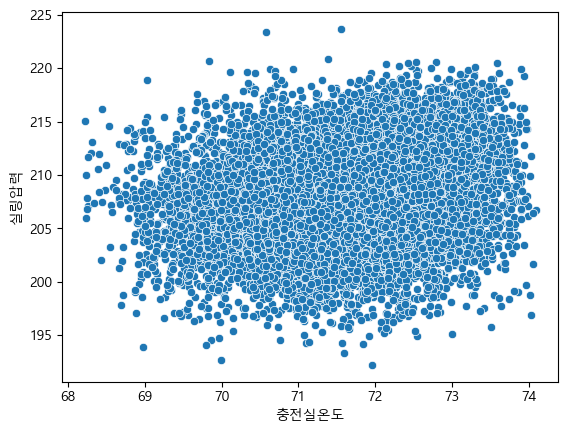

In [32]:
sns.scatterplot(x=df1['충전실온도'],y=df1['실링압력'])

<AxesSubplot: xlabel='충전실온도', ylabel='생산시간'>

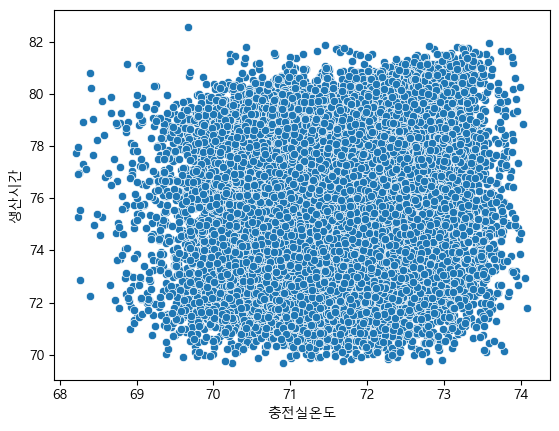

In [33]:
sns.scatterplot(x=df1['충전실온도'],y=df1['생산시간'])

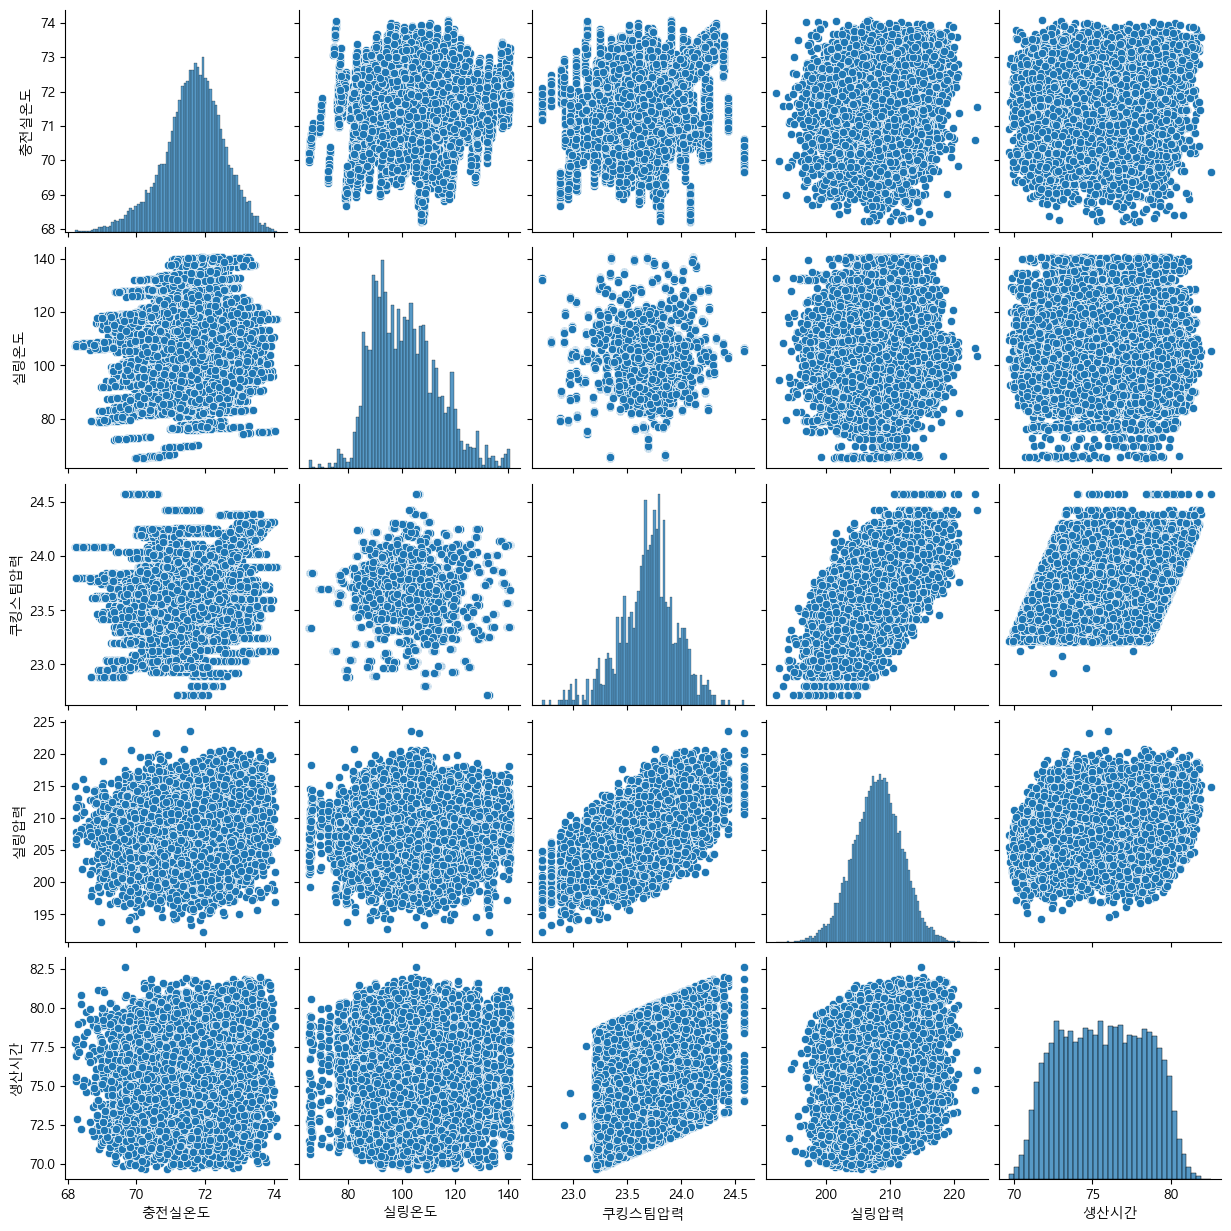

In [34]:
sns.pairplot(df1[['충전실온도','실링온도', '쿠킹스팀압력','실링압력','생산시간']])